# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

import warnings
warnings.simplefilter("ignore", UserWarning)

## Baca data
File `*.csv` dan `*.ipynb` berada dalam folder yang sama untuk memudahkan pembacaan data

In [3]:
# Read data
data = pd.read_csv('data_megaentry_2023.csv')

## Mengganti format dan nama
Menjadikan format tanggal dengan menggunakan `pd.to_datetime`.

Mengganti nama dengan menggunakan `rename`.

In [4]:
# Mengganti format DATA TIMESTAMP menjadi format tanggal
data['DATE'] = pd.to_datetime(data['DATA TIMESTAMP'])

# Mengganti nama header sesuai keinginan
data = data.rename(columns={'RAINFALL 24H RRRR': 'RRRR', 'TEMP MIN C TNTNTN': 'TNTN'})

## Memilih data dan waktu
Memilih data dengan syarat jam bisa menggunakan `dt.hour`. Jika ingin memilih data dengan syarat bulan bisa menggunakna `dt.month`. 

Hal ini bisa di lakukan karena kita sudah mengubah format DATE menjadi format tanggal.


In [5]:
# Memilih data tanggal, hujan dan suhu minimum
data_24 = data[['DATE', 'RRRR', 'TNTN']]

# Memilih data pada pukul 00 UTC
data_24 = data_24[data_24['DATE'].dt.hour == 0]

## Filter data curah hujan
Filter data curah hujan di atas 0 mm.

In [6]:
# Memfilter data hujan di atas 0 mm. Supaya data hujan 0 itu diabaikan atau hilang.
data_24_non_0 = data_24[data_24['RRRR'] > 0]

Ada beberapa cara Filter waktu yang dapat digunakan, seperti Filter data curah hujan berdasarkan bulan dapat menggunakan `dt.month`. Filter dengan menggunakan urutan waktu bisa menggunakan `iloc`. Filter data curah hujan berdasarkan spesific tanggal `dt.date`. 



In [7]:
# Filter berdasarkan bulan
feb_data = data_24[data_24['DATE'].dt.month == 2]

# Filter berdasarkan urutan waktu
sel_data = data_24.iloc[1:91]

# Filter berdasarkan waktu spesifik
start_date = pd.to_datetime('2023-02-01T00:00:00.000Z')
end_date = pd.to_datetime('2023-06-01T00:00:00.000Z')

# Filter untuk 1 tanggal
select_1_date = data_24[data_24['DATE'].dt.date == start_date.date()]

# Filter untuk range data antara tanggal mulai dan akhir
range_date = data_24[(data_24['DATE'] >= start_date) & (data_24['DATE'] <= end_date)]

# Filter untuk beberapa tanggal
multi_date = data_24[data_24['DATE'].dt.date.isin([start_date.date(), end_date.date()])]

## Replace data
mereplace suatu nilai dapat menggunakan `replace`. Jika tidak ada nilai *(NaN)*, dapat kita ubah menjadi sebuah nilai dengan menggunakan `fillna`. Jika ingin menghapus semua data *NaN*, bisa menggunakan `dropna`.  

In [8]:
# Replace nilai RRRR 9999 dan 8888 menjadi 0
data_24['RRRR'] = data_24['RRRR'].replace([9999, 8888], 0)

# Menghapus NaN data agar tidak dihitung
data_24_non_nan = data_24.dropna()

# Replace NaN data menjadi 0
data_24 = data_24.fillna(0)

# mengganti nama agar mempermudah
time = data_24['DATE']
prec = data_24['RRRR']
tmin = data_24['TNTN']

## Pengolahan Statistik
Ada berbagai pengolahan statistik sederhana yang dapat digunakan seperti `mean, max, min, variance, standard deviation, skewness, kurtosis, sum` dan `percentile`.

In [9]:
# data length
count_data = len(prec)
print(f'Length of data: {count_data}')

# Mean data
data_mean = np.mean(prec)
print(f'Mean Precipitation using numpy: {data_mean:.2f}')

# Max data
data_max = np.max(prec)
print(f'Max Precipitation: {data_max:.2f}')

# Min data
data_min = np.min(prec)
print(f'Min Precipitation: {data_min:.2f}')

# Variance data
data_var = np.var(prec)
print(f'Variance Precipitation: {data_var:.2f}')

# Standard deviation data
data_std = np.std(prec)
print(f'Standard Deviation Precipitation: {data_std:.2f}')

# sum data
data_sum = np.sum(prec)
print(f'Sum Precipitation: {data_sum:.2f}')

# Skewness data
data_skew = sps.skew(prec, bias=True)
print(f'Skewness Precipitation: {data_skew:.2f}')

# Kurtosis data
data_kurtosis = sps.kurtosis(prec, bias=True)
print(f'Kurtosis Precipitation: {data_kurtosis:.2f}')

# Percentile 90
percentile_90 = np.percentile(prec, 90)
print(f'Precentile 90: {percentile_90:.2f}')


Length of data: 365
Mean Precipitation using numpy: 4.50
Max Precipitation: 69.30
Min Precipitation: 0.00
Variance Precipitation: 92.75
Standard Deviation Precipitation: 9.63
Sum Precipitation: 1641.60
Skewness Precipitation: 3.47
Kurtosis Precipitation: 14.47
Precentile 90: 14.36


## Menghitung jumlah data dengan sebuah kondisi
menggunakan `sum` dapat menghitung total jumlah data yang memenuhi syarat.

In [10]:
# Menghitung jumlah hujan diatas nilai rata-rata
count_mean_rain = np.sum((prec >= data_mean))
print(f'Total precipitation greater than mean: {count_mean_rain}')

# Menghitung jumlah hujan di atas nilai percentile 90
count_percentile_rain = np.sum((prec >= percentile_90))
print(f'Total percipitation greater than Percentile 90: {count_percentile_rain}')

# Menghitung jumlah curah hujan diantara nilai rata-rata dan percentil 90
count_rain_conditionally = np.sum((prec >= data_mean) & (prec <=percentile_90))
print(f'Total percipitation conditionally: {count_rain_conditionally}')

Total precipitation greater than mean: 91
Total percipitation greater than Percentile 90: 37
Total percipitation conditionally: 54


## Plotting Timeseries menggunakan `Matplotlib`
Ploting time series dapat menggunakan `plot`. Selain itu, dapat menambah keterangan seperti `xlabel, ylabel, legend` dan `title`. `axhline` digunakan untuk menambahkan garis secara horizontal pada grafik. Selain itu, untuk membuat garis bentuknya berbeda-beda dapat menggantikan `linestyle` pada baris `axhline`.

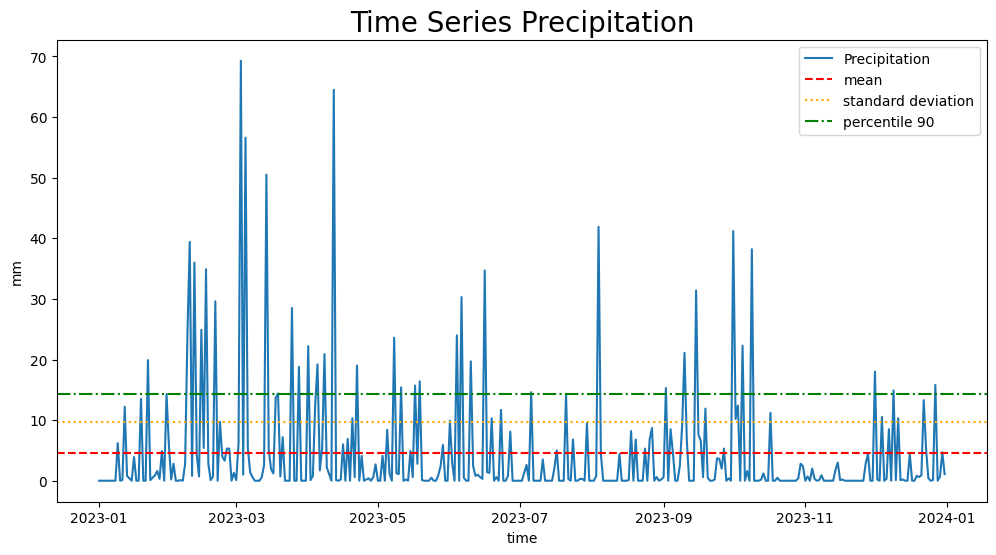

In [11]:
# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(time, prec, label='Precipitation')
plt.title('Time Series Precipitation', fontsize=20)
plt.xlabel('time')
plt.ylabel('mm')
plt.axhline(data_mean, color='red', linestyle='--', label='mean')
plt.axhline(data_std, color='orange', linestyle=':', label='standard deviation')
plt.axhline(percentile_90, color='green', linestyle='-.', label='percentile 90')
plt.legend(loc='best')
plt.show()

## <tt>Latihan 1
### Buatkan timeseries Curah Hujan bulan Juni dan tambahkan garis percentile 98, mean, dan standard deviation

Langkah 1: select data di bulan Juni dengan menggunakan `dt.month` dan definisikan dengan nama baru.

Langkah 2: buatkan nilai persentil 98 dengan menggunakan `np.percentile`, untuk nilai mean dengan menggunakan `np.mean`, dan untuk nilai standard deviation dengan menggunakan `np.std`.

Langkah 3: Plot data dengan menggunakan `plt.plot` dan buat garis secara horizontal dengan menggunakan `plt.axhline`.


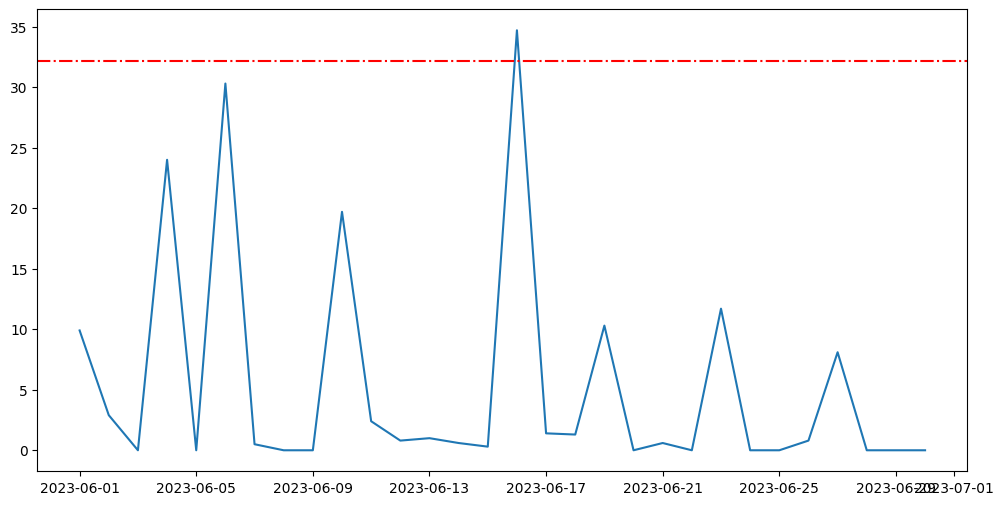

In [12]:
"""Your code is here"""
june_data = data_24[data_24['DATE'].dt.month == 6]
p98_june = np.percentile(june_data['RRRR'], 98)

plt.figure(figsize=(12, 6))
plt.plot(june_data['DATE'], june_data['RRRR'])
plt.axhline(p98_june, linestyle='-.', color='red')
plt.show()

## Plotting Histogram menggunakan `Matplotlib`
Ploting data menjadi sebuah distribusi dapat menggunakan `hist`. Dan untuk menambah garis keterangan secara vertikal dapat menggunakan `axvline`. Selain itu, bentuk dari `hist` dapat diubah sesuai keinginan kita dengan mengganti `histtype`.

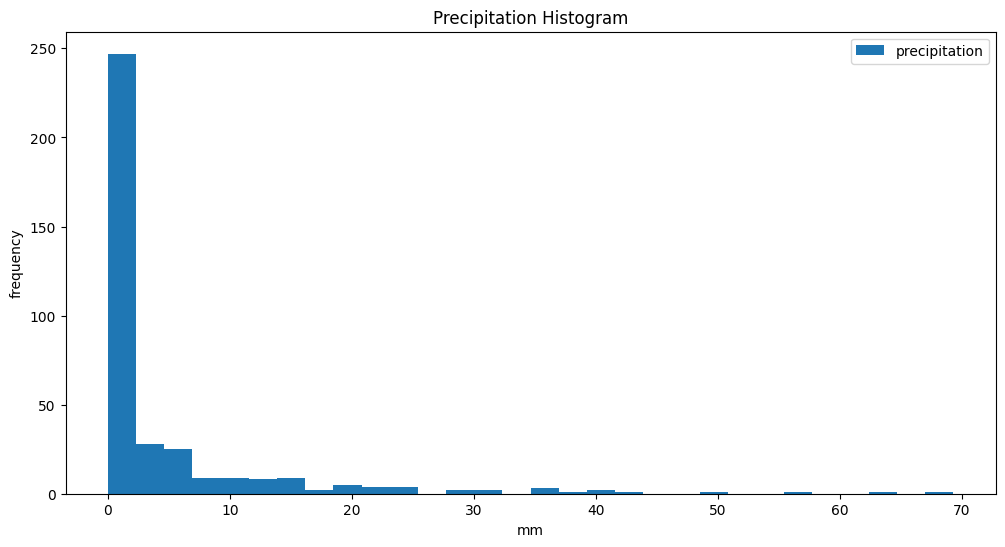

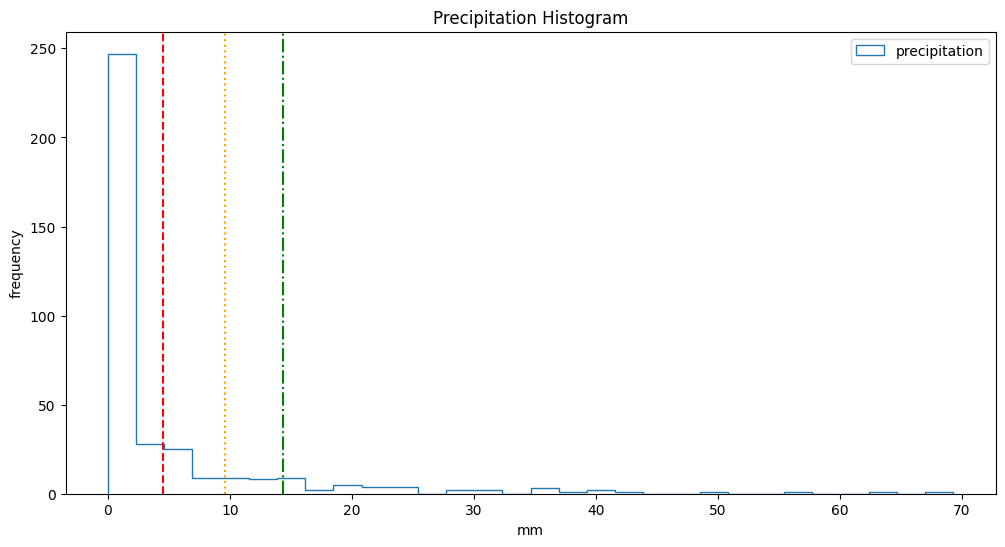

In [13]:
# ploting histogram 
plt.figure(figsize=(12, 6))
plt.hist(prec, 30, label='precipitation')
plt.title('Precipitation Histogram')
plt.xlabel('mm')
plt.ylabel('frequency')
plt.legend(loc='best')
plt.show()

# Ploting histogram with line
plt.figure(figsize=(12, 6))
plt.hist(prec, 30, label='precipitation', histtype='step')
plt.title('Precipitation Histogram')
plt.xlabel('mm')
plt.ylabel('frequency')
plt.legend(loc='best')
plt.axvline(data_mean, color='red', linestyle='--', label='mean')
plt.axvline(data_std, color='orange', linestyle=':', label='standard deviation')
plt.axvline(percentile_90, color='green', linestyle='-.', label='percentile 90')
plt.show()


## Plotting Histogram menggunakan `Seaborns`
Ploting histogram dengan menggunakan `seaborns` tidak berbeda jauh dibandingkan `matplotlib`, ini merupakan cara lain untuk menampilkan histogram. Ploting dapat menggunakan `histplot`. Selain itu, jumlah `bins` juga dapat diganti sesuai keinginan.

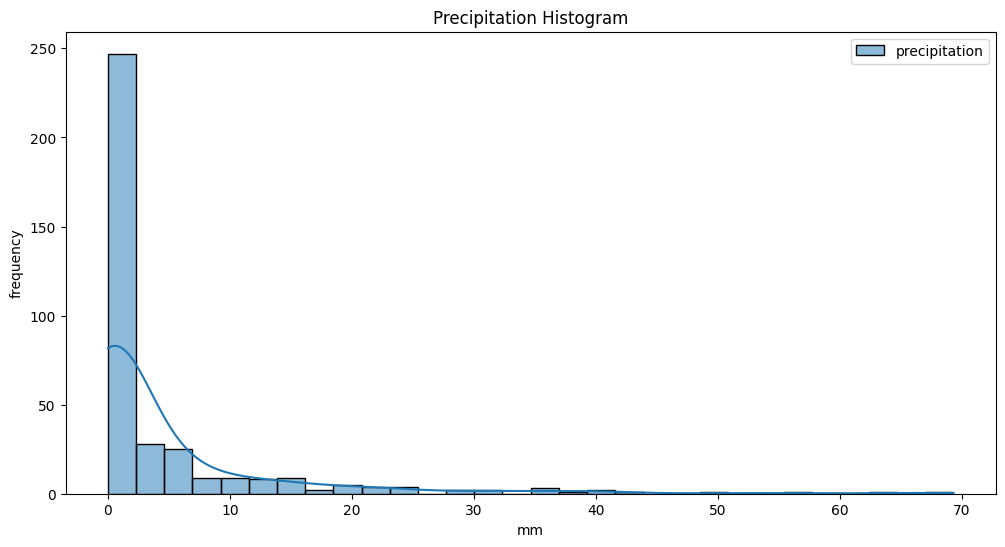

In [14]:
# ploting histogram
plt.figure(figsize=(12, 6))
sns.histplot(prec, bins=30, label='precipitation', kde=True)
plt.title('Precipitation Histogram')
plt.xlabel('mm')
plt.ylabel('frequency')
plt.legend(loc='best')
plt.show()

## <tt>Latihan 2
### Buatkan distribusi curah hujan diatas 20 mm/day

Langkah 1: definisikan data hujan di atas 20 mm / day dengan nama baru.

Langkah 2: plot data menggunakan `plt.hist`.

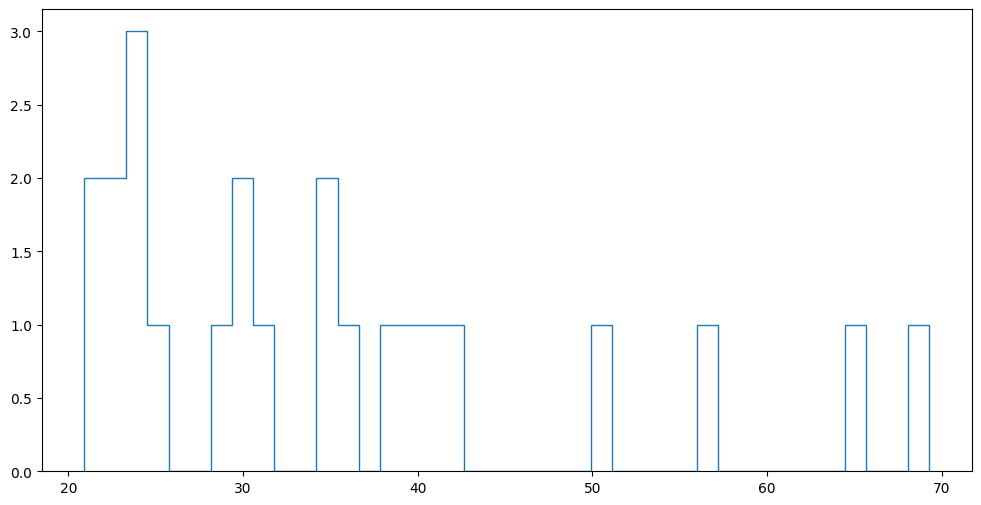

In [15]:
"""Your code is here"""
data_24_greater_20 = data_24[data_24['RRRR'] >= 20]

plt.figure(figsize=(12, 6))
plt.hist(data_24_greater_20['RRRR'], 40, label='precipitation', histtype='step')

plt.show()

## Plotting Boxplot menggunakan `seaborns`
Ploting boxplot menggunakan `seaborns` dapat menggunakan `boxplot`. Ploting ini biasanya digunakan untuk melihat sebaran dari data tersebut.

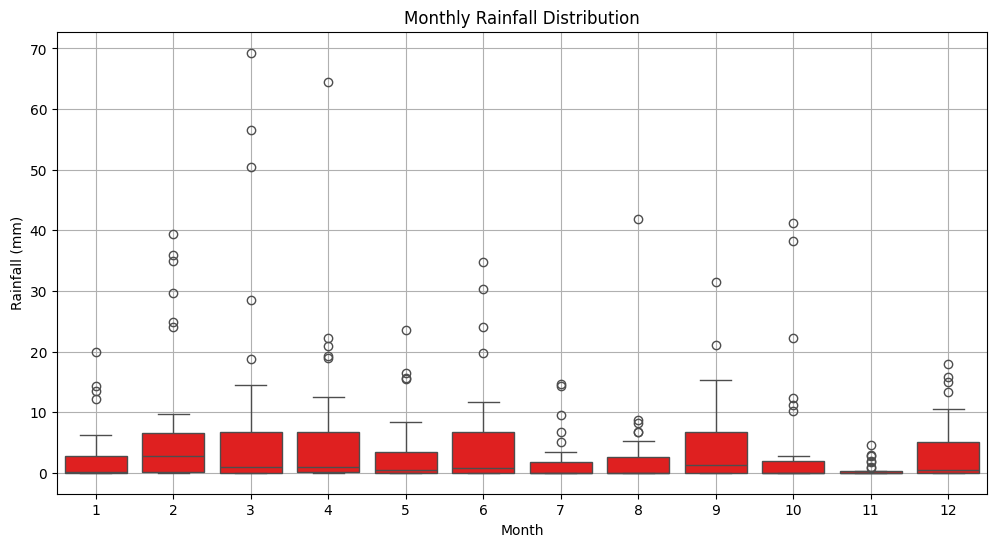

In [16]:
data_24['MONTH'] = data['DATE'].dt.month

# Plotting the boxplot for each month
plt.figure(figsize=(12, 6))
sns.boxplot(x='MONTH', y='RRRR', data=data_24, color='red')
plt.title('Monthly Rainfall Distribution')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()


## Menghitung korelasi
Terdapat 2 metode korelasi dan 2 libraries yang dapat digunakan, yaitu dengan menggunakan `pandas` dan `scipy`. Meskipun libraries yang digunakan berbeda, hasil yang didapatkan akan sama.

In [17]:
# Correlation menggunakan pandas
cor_pearson = prec.corr(tmin, method='pearson')
print(f'Pearson correlation: {cor_pearson:.2f}')

cor_kendall = prec.corr(tmin, method='kendall')
print(f'Kendall correlation: {cor_kendall:.2f}')


# Correlation menggunakan scipy
pearson_coef, pearson_p = sps.pearsonr(prec, tmin)
print(f'Pearson correlation: {pearson_coef:.2f}')

kendall_coef, kendall_p = sps.kendalltau(prec, tmin)
print(f'Kendall correlation: {kendall_coef:.2f}')


Pearson correlation: -0.36
Kendall correlation: -0.25
Pearson correlation: -0.36
Kendall correlation: -0.25


## Menghitung regresi linear
Menghitung regresi linear dapat menggunakan `linregress`. Regresi linear biasanya mem-ploting data secara `scatter` (untuk melihat sebaran data) dan garis regresi tersebut.

slope value: -0.03
intercept value: 24.48
new slope value: 24.34
r value: -0.36


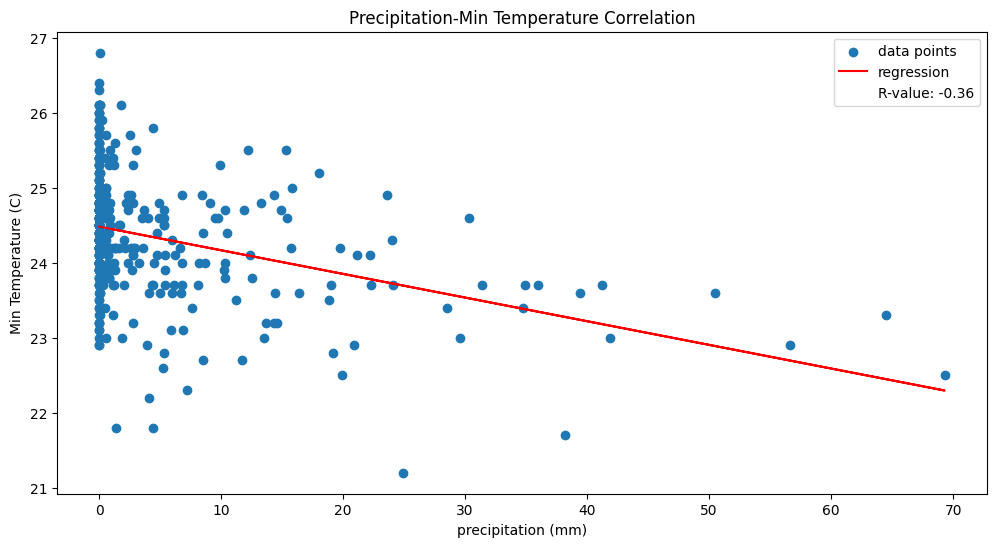

In [26]:
# Regresi linear
slope, intercept, r_value, p_value, std_err = sps.linregress(prec, tmin)

# Menghitung nilai slope yang baru
predicted_values = prec * slope + intercept

print(f'slope value: {slope:.2f}')
print(f'intercept value: {intercept:.2f}')
print(f'new slope value: {np.mean(predicted_values):.2f}')
print(f'r value: {r_value:.2f}')

# Ploting correlation, scatter
plt.figure(figsize=(12, 6))
plt.scatter(prec, tmin, label='data points')
plt.plot(prec, predicted_values, color='red', label='regression')
plt.title('Precipitation-Min Temperature Correlation')
plt.xlabel('precipitation (mm)')
plt.ylabel('Min Temperature (C)')

# Display R-value on the plot
plt.plot([], [], ' ', label=f'R-value: {r_value:.2f}')
# plt.text(1, 1, f'R-value: {r_value:.2f}', fontsize=12, color='blue')

plt.legend(loc='upper right')
plt.show()

Menghitung residu dapat menggunakan `statsmodels.api` agar menggunakan QQ-plot

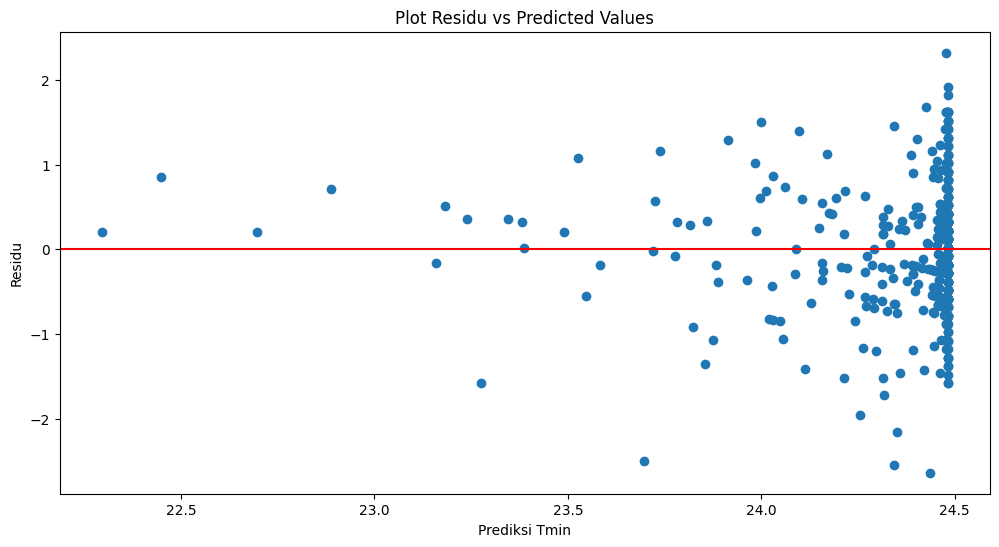

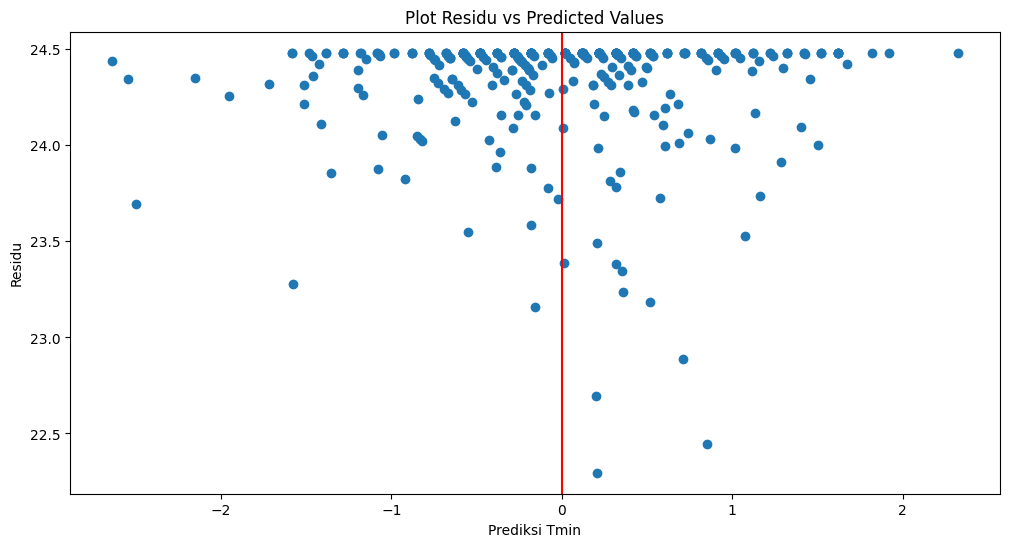

<Figure size 1200x600 with 0 Axes>

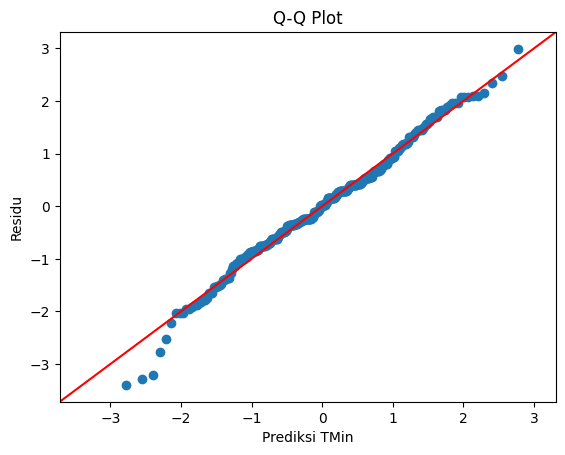

In [27]:
import statsmodels.api as sm

# Menghitung residu
residu = tmin - predicted_values

# Ploting residu vs prediksi
plt.figure(figsize=(12, 6))
plt.scatter(predicted_values, residu, label='data points')
plt.axhline(0, color='red')
plt.title('Plot Residu vs Predicted Values')
plt.xlabel('Prediksi Tmin')
plt.ylabel('Residu')
plt.show()

# Ploting residu vs prediksi
plt.figure(figsize=(12, 6))
plt.scatter(residu, predicted_values, label='data points')
plt.axvline(0, color='red')
plt.title('Plot Residu vs Predicted Values')
plt.xlabel('Prediksi Tmin')
plt.ylabel('Residu')
plt.show()

# Q-Q Plot
plt.figure(figsize=(12, 6))
sm.qqplot(residu, line='45', fit=True)
plt.title('Q-Q Plot')
plt.xlabel('Prediksi TMin')
plt.ylabel('Residu')
plt.show()

## <tt>Latihan 3
### Plot korelasi antara RRRR diatas 10 mm/day dan Tmin

Langkah 1: definisikan hujan diatas 10 mm dan buat dengan nama baru.

Langkah 2: definisikan data curah hujan dan suhu minimum masing-masing dengan nama baru

Langkah 3: menggunakan `sps.linregress` untuk mendapatkan linear regression agar mendapatkan nilai `slope, intercept,` dan `r`.

Langkah 4: Hitunglah nilai slope yang baru

Langkah 5: plot hasil dengan menggunakan `plt.scatter` untuk mengetahui sebarannya.

Langkah 6: plot garis regresinya dengan menggunakan `plt.plot`.



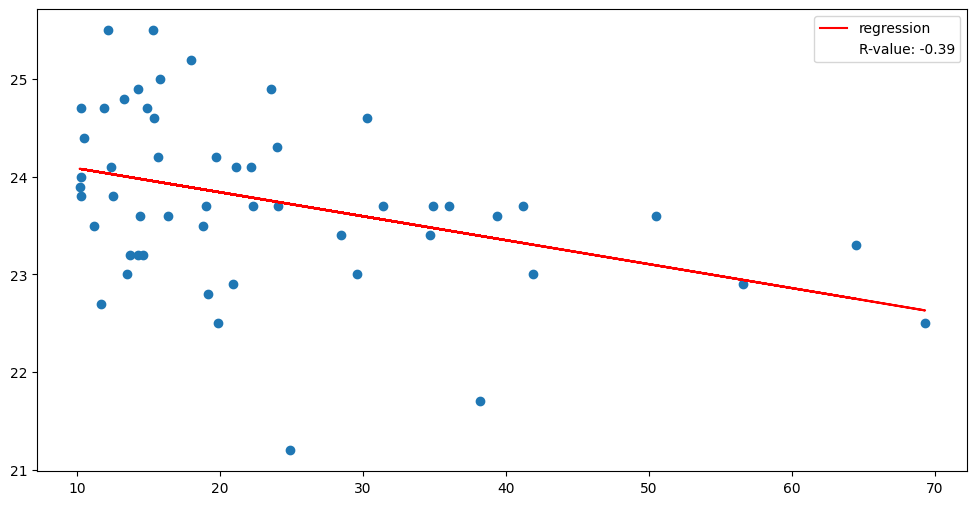

In [20]:
"""Your code is here"""
data_24_greater_10 = data_24[data_24['RRRR'] >= 10]

prec_greater_10 = data_24_greater_10['RRRR']
tmin_greater_10 = data_24_greater_10['TNTN']

slope_greater_10, intercept_greater_10, r_value_greater_10, _, _ = sps.linregress(prec_greater_10, tmin_greater_10)
predicted_values_greater_10 = prec_greater_10 * slope_greater_10 + intercept_greater_10

plt.figure(figsize=(12, 6))
plt.scatter(prec_greater_10, tmin_greater_10)
plt.plot(prec_greater_10, predicted_values_greater_10, color='red', label='regression')
plt.plot([], [], ' ', label=f'R-value: {r_value_greater_10:.2f}')
plt.legend(loc='upper right')
plt.show()


## Menampilkan polinomial
Menghitung nilai polinomial dapat menggunakan `polyfit` dan `poly1d`. 

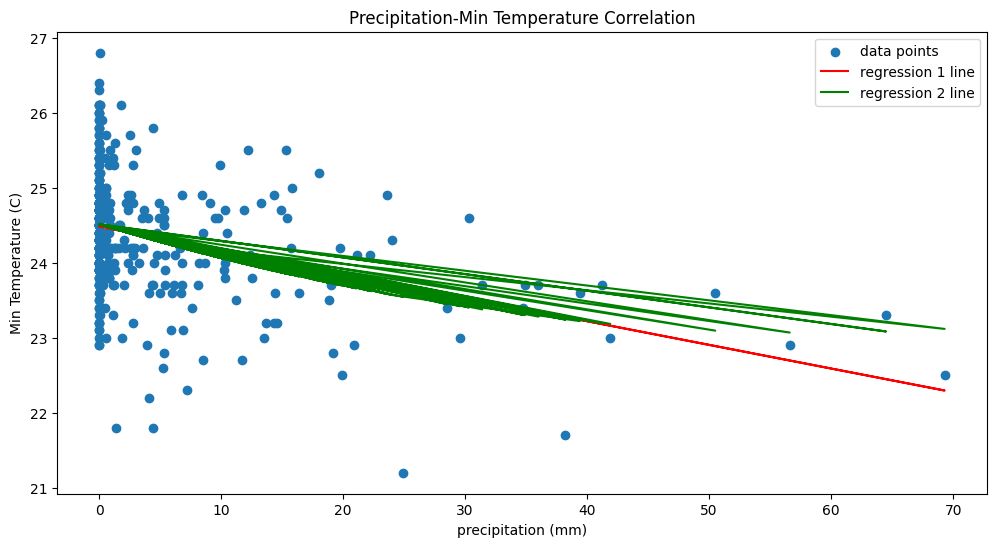

In [21]:
polin1 = np.poly1d(np.polyfit(prec, tmin, 1))
polin2 = np.poly1d(np.polyfit(prec, tmin, 2))

# Ploting correlation, polinom
plt.figure(figsize=(12, 6))
plt.scatter(prec, tmin, label='data points')
plt.plot(prec, polin1(prec), color='red', label='regression 1 line')
plt.plot(prec, polin2(prec), color='green', label='regression 2 line')
plt.title('Precipitation-Min Temperature Correlation')
plt.xlabel('precipitation (mm)')
plt.ylabel('Min Temperature (C)')

plt.legend(loc='upper right')
plt.show()

## <tt>Latihan tambahan
### Plotting regresi 2 line antara curah hujan diatas 10 mm/day dan Tmin

Langkah 1: definisikan nilai polinomial dengan data curah hujan dan suhu minimum yang sudah diseleksi

Langkah 2: plot hasil dengan menggunakan `plt.scatter` untuk mengetahui sebarannya.

Langkah 3: plot garis regresinya dengan menggunakan `plt.plot`.

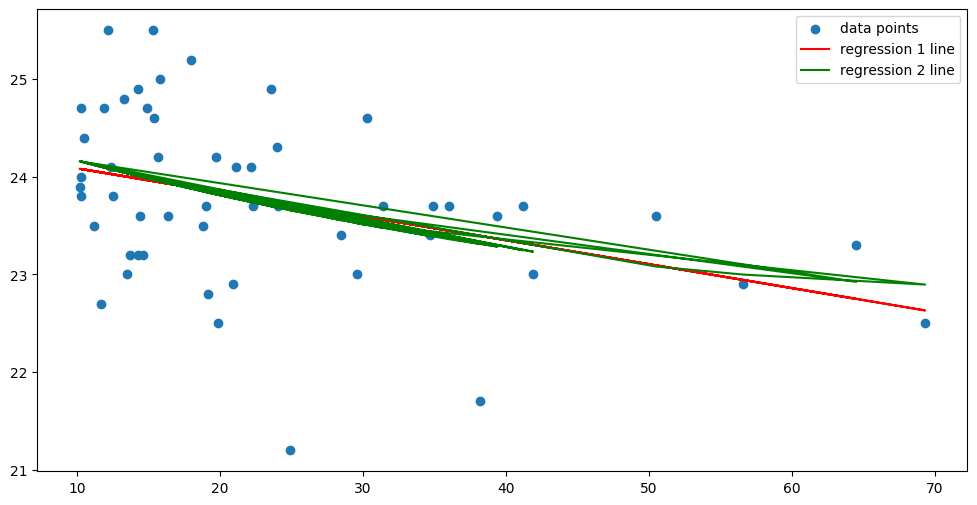

In [22]:
"""Your code is here"""
polin1_10 = np.poly1d(np.polyfit(prec_greater_10, tmin_greater_10, 1))
polin2_10 = np.poly1d(np.polyfit(prec_greater_10, tmin_greater_10, 2))

# Ploting correlation, polinom
plt.figure(figsize=(12, 6))
plt.scatter(prec_greater_10, tmin_greater_10, label='data points')
plt.plot(prec_greater_10, polin1_10(prec_greater_10), color='red', label='regression 1 line')
plt.plot(prec_greater_10, polin2_10(prec_greater_10), color='green', label='regression 2 line')

plt.legend(loc='upper right')
plt.show()